### CodeWalk on Kernel Trick
Thanks to [CampusX](https://youtu.be/pjvmVMDrzVU?list=PLKnIA16_RmvbOIFee-ra7U6jR2oIbCZBL)

In [1]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

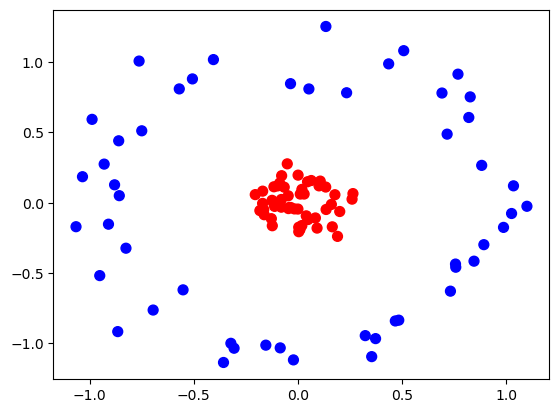

In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor = 0.1, noise = 0.1)

plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'bwr')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [12]:
# Copied from https://github.com/campusx-official/Support-Vector-Machines-SVM-/blob/master/Kernel%20Trick%20SVM.ipynb
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Atul\AppData\Local\Temp\ipykernel_1220\3305778871.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


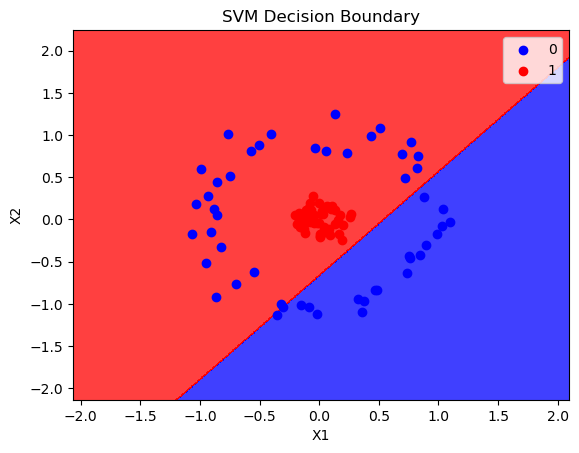

In [13]:
plot_decision_boundary(X,y, classifier)

### Transforming the data

In [18]:
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1))    # Radial Basis Function e^(-x^2)
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=100, cmap = 'bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

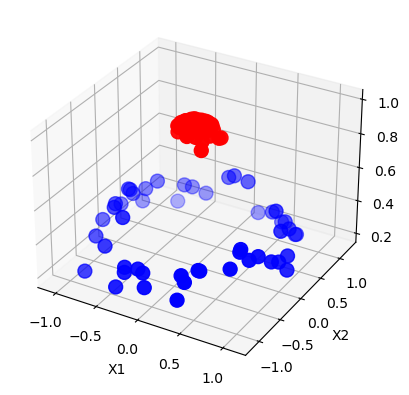

In [19]:
plot_3d_plot(X,y)

In [20]:
# Model

rbf_classifier = SVC(kernel = 'rbf')
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Atul\AppData\Local\Temp\ipykernel_1220\3305778871.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


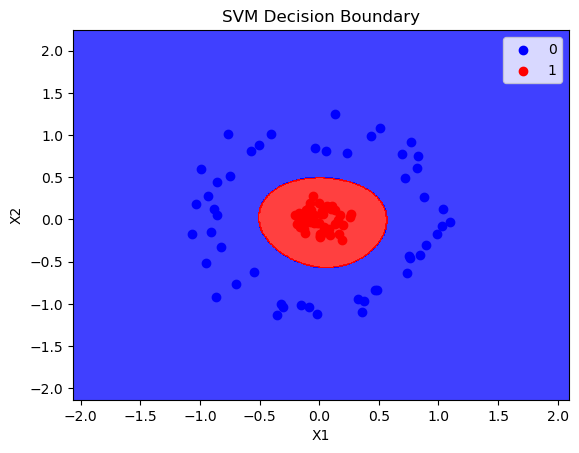

In [22]:
plot_decision_boundary(X,y,rbf_classifier)